# Team YSI - Titanic: Machine Learning from Disaster

### Exploring the data

In [57]:
import pandas as pd
import csv as csv
import numpy as np
import matplotlib.pyplot as plt

# Load the training data into data frame
main_train_df = pd.read_csv('input/train.csv', header=0)

# show first 2 rows
print main_train_df.ix[0]
print ""
print main_train_df.ix[1]
print ""
# show last 2 rows
print main_train_df.iloc[-2]
print ""
print main_train_df.iloc[-1]
print ""

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                

In [58]:
# The size() function counts how many elements are in
# in the array and sum() (as you would expects) sums up
# the elements in the array.

number_passengers = np.size(main_train_df['Survived'].astype(np.float))
number_survived = np.sum(main_train_df['Survived'].astype(np.float))
proportion_survivors = number_survived / number_passengers

print proportion_survivors

0.383838383838


In [86]:
# Show the unique values in some columns
print 'Survived: ' + ', '.join(map(str, np.unique(main_train_df['Survived'])))
print 'Pclass: ' + ', '.join(map(str, np.unique(main_train_df['Pclass'])))
print 'Sex: ' + ', '.join(map(str, np.unique(main_train_df['Sex'])))
print 'SibSp: ' + ', '.join(map(str, np.unique(main_train_df['SibSp'])))
print 'Parch: ' + ', '.join(map(str, np.unique(main_train_df['Parch'])))
print 'Embarked: ' + ', '.join(map(str, np.unique(main_train_df['Embarked'])))

#print "Null values" + main_train_df[(main_train_df['Age'] == "")]

Survived: 0, 1
Pclass: 1, 2, 3
Sex: female, male
SibSp: 0, 1, 2, 3, 4, 5, 8
Parch: 0, 1, 2, 3, 4, 5, 6
Embarked: nan, C, Q, S


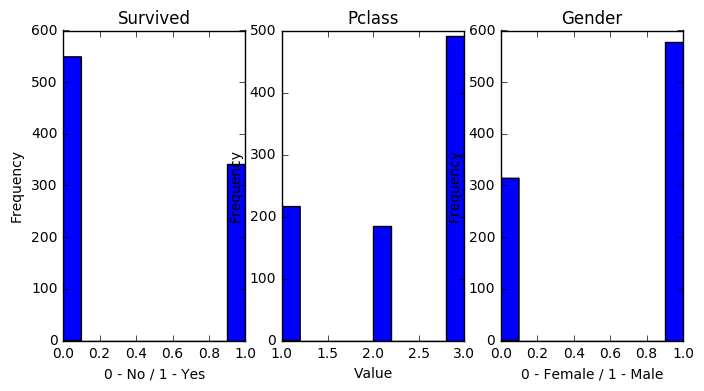

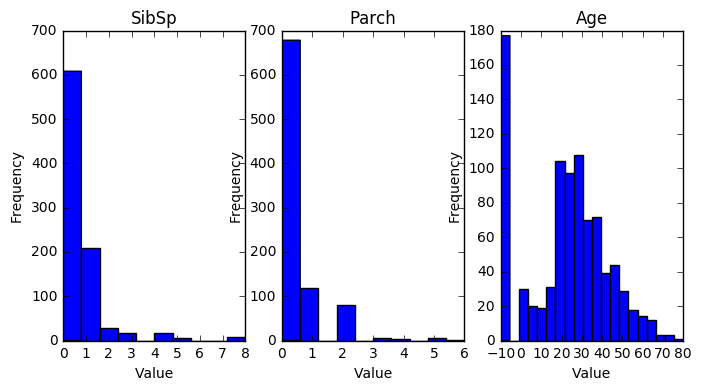

In [109]:
plt.figure(figsize=(8,4), dpi=100)
plt.subplot(131)
plt.title('Survived')
plt.xlabel('0 - No / 1 - Yes')
main_train_df['Survived'].fillna(-1).plot.hist()

plt.subplot(132)
plt.title('Pclass')
plt.xlabel('Value')
main_train_df['Pclass'].fillna(-10).plot.hist()

plt.subplot(133)
plt.title('Gender')
plt.xlabel('0 - Female / 1 - Male')
# female = 0, male = 1
main_train_df['Gender'] = main_train_df['Sex'].map( {'female': 0, 'male': 1, np.nan: -1} ).astype(int)
main_train_df['Gender'].fillna(-1).plot.hist()

plt.figure(figsize=(8,4))
plt.subplot(131)
plt.title('SibSp')
plt.xlabel('Value')
main_train_df['SibSp'].fillna(-10).plot.hist()

plt.subplot(132)
plt.title('Parch')
plt.xlabel('Value')
main_train_df['Parch'].fillna(-10).plot.hist()

#plt.figure()
#main_train_df['Embarked'].plot.hist()

plt.subplot(133)
plt.title('Age')
plt.xlabel('Value')
main_train_df['Age'].fillna(-10).plot.hist(bins=20)

plt.show()

In [46]:
women_only_stats = main_train_df['Sex'] == "female" # This finds where all 
                                           # the elements in the gender
                                           # column that equals “female”
men_only_stats = main_train_df['Sex'] != "female"   # This finds where all the 
                                           # elements do not equal 
                                           # female (i.e. male)

# Using the index from above we select the females and males separately
women_onboard = main_train_df.ix[women_only_stats, 'Survived'].astype(np.float)
men_onboard = main_train_df.ix[men_only_stats, 'Survived'].astype(np.float)

# Then we finds the proportions of them that survived
proportion_women_survived = np.sum(women_onboard) / np.size(women_onboard)
proportion_men_survived = np.sum(men_onboard) / np.size(men_onboard)

# and then print it out
print 'Proportion of women (%s) who survived (%s) is %s ' %(np.size(women_onboard), np.sum(women_onboard), proportion_women_survived)
print 'Proportion of men (%s) who survived (%s) is %s' %(np.size(men_onboard), np.sum(men_onboard), proportion_men_survived)

Proportion of women (314) who survived (233.0) is 0.742038216561 
Proportion of men (577) who survived (109.0) is 0.188908145581


### Show average age per gender

In [49]:
total_count_w = np.sum(women_only_stats)
total_count_m = np.sum(men_only_stats)
total_age_w = np.sum(main_train_df.ix[women_only_stats, 'Age'].dropna().astype(np.float))
total_age_m = np.sum(main_train_df.ix[men_only_stats,   'Age'].dropna().astype(np.float))

print "Total women: %s, total age: %s, avg: %s" %(total_count_w, total_age_w, total_age_w/total_count_w)
print "Total men: %s, total age: %s, avg: %s" %(total_count_m, total_age_m, total_age_m/total_count_m)


Total women: 314, total age: 7286.0, avg: 23.2038216561
Total men: 577, total age: 13919.17, avg: 24.1233448873
